<a href="https://colab.research.google.com/github/chacha715/ESAA/blob/main/mp)_%EB%AA%A8%EB%8D%B8_%EC%B7%A8%ED%95%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터셋 불러오기

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import numpy as np
import pandas as pd 

In [42]:
pd.options.display.float_format = '{:.2f}'.format

In [43]:
train = pd.read_csv('/content/drive/MyDrive/ESAA/YB 1조/train 지역변수 추가.csv')
test = pd.read_csv('/content/drive/MyDrive/ESAA/YB 1조/test 지역변수 추가.csv')

In [ ]:
# train = pd.read_csv("/content/train 지역변수 추가.csv")
# test = pd.read_csv("/content/test 지역변수 추가.csv")
# sb = pd.read_csv("/content/submission_sample.csv")

In [ ]:
test.head(3)

In [ ]:
train.head(3)

In [ ]:
train.describe()

#### **변수설명**
> `inst_id` - 각 파일에서의 병원 고유 번호
`OC` – 영업/폐업 분류, 2018년 폐업은 2017년 폐업으로 간주함    
`sido` – 병원의 광역 지역 정보    
`sgg` – 병원의 시군구 자료     
`openDate` – 병원 설립일    
`bedCount` - 병원이 갖추고 있는 병상의 수       
`instkind` – 병원, 의원, 요양병원, 한의원, 종합병원 등 병원의 종류    
·        종합병원 : 입원환자 100명 이상 수용 가능    
·        병원 : 입원 환자 30명 이상 100명 미만 수용 가능     
·        의원 : 입원 환자 30명 이하 수용 가능      
·        한방 병원(한의원) : 침술과 한약으로 치료하는 의료 기관.    
`revenue1` – 매출액 / salescost1 – 매출원가      
`sga1` - 판매비와 관리비 / salary1 – 급여   
`noi1` – 영업외수익 / noe1 – 영업외비용      
`Interest1` – 이자비용 / ctax1 – 법인세비용     
`Profit1` – 당기순이익 / liquidAsset1 – 유동자산      
`quickAsset1` – 당좌자산 / receivableS1 - 미수금(단기)       
`inventoryAsset1` – 재고자산 / nonCAsset1 – 비유동자산     
`tanAsset1` – 유형자산 / OnonCAsset1 - 기타 비유동자산       
`receivableL1` – 장기미수금 / debt1 – 부채총계      
`liquidLiabilities1` – 유동부채 / shortLoan1 – 단기차입금    
`NCLiabilities1` – 비유동부채 / longLoan1 – 장기차입금    
`netAsset1` – 순자산총계 / surplus1 – 이익잉여금    
`employee1` – 고용한 총 직원의 수     
`ownerChange` – 대표자의 변동 

# 2. EDA 및 전처리

In [ ]:
train.isnull().sum()

In [ ]:
test.isnull().sum()

### (1) 레이블 데이터 : 인코딩

In [44]:
from sklearn.preprocessing import LabelEncoder

# OC : 'close': 0, 'open': 1 처리해주기
print(train['OC'].value_counts()) #인코딩전 확인
encoder1 = LabelEncoder()
train['OC']=encoder1.fit_transform(train['OC'])
print(train['OC'].value_counts()) #인코딩후 확인

# 테스트데이터셋은 OC가 모두 NaN이므로 레이블인코딩 처리x

open      286
 close     15
Name: OC, dtype: int64
1    286
0     15
Name: OC, dtype: int64


### (2) 피처 데이터 : 결측치 처리 및 인코딩

* 문자열 피처의 결측치는 Not_sure 로 대체.
* 숫자형 피처의 결측치는 -9999 로 대체.


#### (2)-1. ints_id, sgg

In [45]:
# inst_id : 인덱스 중복이므로 열 버리기
# sgg : sido와 정보가 겹치므로 열 버리기
train.drop(['inst_id','sgg'],axis=1,inplace=True)
test.drop(['inst_id','sgg'],axis=1,inplace=True)

#### (2)-2. 문자열 피처

In [46]:
## 문자열 피처에서 결측치가 존재할 경우, 'Not_sure'로 대체
# 문자열 피처중 instkind, ownerChange 에서 결측치 존재

train['instkind'] = train['instkind'].fillna('Not_sure')
test['instkind'] = test['instkind'].fillna('Not_sure')

train['ownerChange'] = train['ownerChange'].fillna('Not_sure')
test['ownerChange'] = test['ownerChange'].fillna('Not_sure')

#### (2)-3. 숫자형 피처중 금융변수

In [ ]:
## 숫자형 피처중 금융변수에서 결측치(NaN) 존재

# open&같은행번호에서 공통적으로 8개의 결측치가 나타난다. 
print(train[train['revenue1'].isnull()]['OC'])
print(train[train['shortLoan2'].isnull()]['OC'])

# 같은행번호에서 공통적으로 2개의 결측치가 나타난다.
print(test[test['revenue1'].isnull()])
print(test[test['shortLoan2'].isnull()])

In [48]:
#NAN인 관측치 처리(dropna)
fin_list=['revenue1', 'salescost1', 'sga1', 'salary1', 'noi1', 'noe1',
       'interest1', 'ctax1', 'profit1', 'liquidAsset1', 'quickAsset1',
       'receivableS1', 'inventoryAsset1', 'nonCAsset1', 'tanAsset1',
       'OnonCAsset1', 'receivableL1', 'debt1', 'liquidLiabilities1',
       'shortLoan1', 'NCLiabilities1', 'longLoan1', 'netAsset1', 'surplus1',
       'revenue2', 'salescost2', 'sga2', 'salary2', 'noi2', 'noe2',
       'interest2', 'ctax2', 'profit2', 'liquidAsset2', 'quickAsset2',
       'receivableS2', 'inventoryAsset2', 'nonCAsset2', 'tanAsset2',
       'OnonCAsset2', 'receivableL2', 'debt2', 'liquidLiabilities2',
       'shortLoan2', 'NCLiabilities2', 'longLoan2', 'netAsset2', 'surplus2']
train.dropna(subset=fin_list, axis=0,inplace=True)
test.dropna(subset=fin_list, axis=0,inplace=True)
#0인 관측치 처리
train[fin_list]=train[fin_list].replace(0 ,-9999)
test[fin_list]=test[fin_list].replace(0 ,-9999)

In [ ]:
## 확인
train.describe()
test.describe()
# 최소값이 -9999로 나타난다.

#### (2)-4. bedcount, employee



In [49]:
## 숫자형 피처의 결측치는 -9999로 대체
train['bedCount']=train['bedCount'].fillna(-9999)
test['bedCount']=test['bedCount'].fillna(-9999)

train['employee1']=train['employee1'].fillna(-9999)
test['employee1']=test['employee1'].fillna(-9999)

train['employee2']=train['employee2'].fillna(-9999)
test['employee2']=test['employee2'].fillna(-9999)

#### (2)-5. 피처 인코딩 처리

In [50]:
## 문자열 피처 인코딩 처리
## 전처리 후 마지막에

# sido는 레이블인코딩 (sido의 개별관측치가 많아 원핫인코딩을 하게 되면 변수개수가 너무많아지기 때문.)
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train['sido'] = encoder.fit_transform(train['sido'])
test['sido'] = encoder.fit_transform(test['sido'])

# instkind, ownerChange는 원핫인코딩
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [ ]:
## 확인
train.head(3)
# sido는 숫자형변수로, instkind, ownerChange는 더미변수로 잘 바뀜.

# 3. 파생변수 만들기

### (1) 금융변수

In [51]:
## 성장성
# 매출액 증가율 = 당기매출액/ 전기매출액*100 -100
train['revenueGrowth']=(train['revenue1']/train['revenue2'])*100-100
# 총자산 증가율 = 당기총자산/ 전기총자산*100 -100
train['netAssetGrowth']=(train['netAsset1']+train['debt1'])/(train['netAsset2']+train['debt2'])*100 -100

## 수익성
# 자기자본순이익률(ROE)=당기순이익/자기자본*100
train['ROE']=(train['profit1']/train['netAsset1'])*100
# 매출순이익률 = 당기순이익/매출액*100
train['ROS'] = train.profit1/train.revenue1*100
# 배당성향 = 배당금/당기순이익
train['dividendPayoutRatio'] = (train.profit1-train.surplus1)/train.profit1
# 이자보상비율 = 영업이익/이자비용*100
# (영업손익은 매출액 등의 영업수익으로부터 매출원가ㆍ판매비와관리비 등의 영업비용을 차감한 개념, 영업 외 이익과 비용도 차감)
train['interestCoverageRatio'] = (train.revenue1-train.salescost1-train.sga1-train.noi1-train.noe1)/train.interest1*100

## 안정성
# 유동비율 = 유동자산/유동부채*100 (바람직: 200%이상)
train['liquidRatio']=(train['liquidAsset1']/train['liquidLiabilities1'])*100
# 당좌비율 = 당좌자산/유동부채*100 (바람직: 100%이상)
train['quickRatio']=(train['quickAsset1']/train['liquidLiabilities1'])*100
# 부채비율 = 부채/자본*100
train['debtRatio']=(train['debt1']/(train['debt1']+train['netAsset1']))*100
# 자기자본비율 = 자기자본/총자본*100
train['netAssetRatio']=train.netAsset1/(train.debt1+train.netAsset1)*100

## 활동성
# 재고자산회전율 = 매출원가/평균재고자산
train['inventoryTurnover']=train.salescost1/((train.inventoryAsset1+train.inventoryAsset2)/2)

In [52]:
## 성장성
# 매출액 증가율 = 당기매출액/ 전기매출액*100 -100
test['revenueGrowth']=(test['revenue1']/test['revenue2'])*100-100
# 총자산 증가율 = 당기총자산/ 전기총자산*100 -100
test['netAssetGrowth']=(test['netAsset1']+test['debt1'])/(test['netAsset2']+test['debt2'])*100 -100

## 수익성
# 자기자본순이익률(ROE)=당기순이익/자기자본*100
test['ROE']=(test['profit1']/test['netAsset1'])*100
# 매출순이익률 = 당기순이익/매출액*100
test['ROS'] = test.profit1/test.revenue1*100
# 배당성향 = 배당금/당기순이익
test['dividendPayoutRatio'] = (test.profit1-test.surplus1)/test.profit1
# 이자보상비율 = 영업이익/이자비용*100
# (영업손익은 매출액 등의 영업수익으로부터 매출원가ㆍ판매비와관리비 등의 영업비용을 차감한 개념, 영업 외 이익과 비용도 차감)
test['interestCoverageRatio'] = (test.revenue1-test.salescost1-test.sga1-test.noi1-test.noe1)/test.interest1*100

## 안정성
# 유동비율 = 유동자산/유동부채*100 (바람직: 200%이상)
test['liquidRatio']=(test['liquidAsset1']/test['liquidLiabilities1'])*100
# 당좌비율 = 당좌자산/유동부채*100 (바람직: 100%이상)
test['quickRatio']=(test['quickAsset1']/test['liquidLiabilities1'])*100
# 부채비율 = 부채/자본*100
test['debtRatio']=(test['debt1']/(test['debt1']+test['netAsset1']))*100
# 자기자본비율 = 자기자본/총자본*100
test['netAssetRatio']=test.netAsset1/(test.debt1+test.netAsset1)*100

## 활동성
# 재고자산회전율 = 매출원가/평균재고자산
test['inventoryTurnover']=test.salescost1/((test.inventoryAsset1+test.inventoryAsset2)/2)

In [ ]:
## 확인
fin_Ratio_list = ['revenueGrowth', 'netAssetGrowth',
    'ROE', 'ROS', 'dividendPayoutRatio', 'interestCoverageRatio',
    'liquidRatio', 'quickRatio', 'debtRatio','netAssetRatio',
    'inventoryTurnover']
train[fin_Ratio_list].describe()

fin_Ratio_list = ['revenueGrowth', 'netAssetGrowth',
    'ROE', 'ROS', 'dividendPayoutRatio', 'interestCoverageRatio',
    'liquidRatio', 'quickRatio', 'debtRatio','netAssetRatio',
    'inventoryTurnover']
test[fin_Ratio_list].describe()
# min값에 0이 없고, max값에 inf가 없다.

### (2) 중소병원/대형병원

In [53]:
train.loc[train.bedCount>300,'hospital_size']=1
train.loc[train.bedCount<=300,'hospital_size']=0

In [54]:
test.loc[test.bedCount>300,'hospital_size']=1
test.loc[test.bedCount<=300,'hospital_size']=0

### (3) 지역 내 병원종류수

In [55]:
#  이건 모델 돌리고나서 만들기
#hospital_count 결측값 처리 코드
train['hospital_count']=train['hospital_count'].replace(np.nan, 1)
#hospital_count 결측값 제거 확인 코드
train['hospital_count'].isnull().sum()

0

# 4. 피처 정규화

* 표준화 : 정규분포를 가진 값으로 변환 
            (x-mean)/sd
* 정규화 : 개별 데이터의 크기를 모두 똑같은 단위로 변경
            (x-min)/(max-min)

In [56]:
#금융변수 정규화
from sklearn.preprocessing import MinMaxScaler
train.loc[:,'revenue1':'surplus2'] = MinMaxScaler().fit_transform(train.loc[:,'revenue1':'surplus2'])
train.loc[:,'revenueGrowth':'inventoryTurnover'] = MinMaxScaler().fit_transform(train.loc[:,'revenueGrowth':'inventoryTurnover'])
test.loc[:,'revenue1':'surplus2'] = MinMaxScaler().fit_transform(test.loc[:,'revenue1':'surplus2'])
test.loc[:,'revenueGrowth':'inventoryTurnover'] = MinMaxScaler().fit_transform(test.loc[:,'revenueGrowth':'inventoryTurnover'])

In [57]:
#전체 데이터 확인
pd.set_option('display.max_columns', None) # 전체 열 보기

In [ ]:
#정규화 여부 확인
train.describe()
#금융변수의 최솟값은 0 최댓값은 1로 정규화가 잘 되었다고 볼 수 있다. 

In [ ]:
## 정규화 여부 확인
test[fin_list].describe()
#금융변수의 최솟값은 0 최댓값은 1로 정규화가 잘 되었다고 볼 수 있다. 

In [ ]:
#정규화 여부 확인
test[fin_Ratio_list].describe()
#금융변수의 최솟값은 0 최댓값은 1로 정규화가 잘 되었다고 볼 수 있다

---
추가 null 확인

In [ ]:
train.isnull().sum().sort_values(ascending=False)

In [ ]:
test.isnull().sum().sort_values(ascending=False)

In [58]:
#test 파일 openDate 결측값 처리
test['openDate'] = test['openDate'].fillna(-9999)
#test 파일 hospita_count 결측값 처리
test['hospital_count'] = test['hospital_count'].fillna(-9999)

In [ ]:
np.shape(train)
np.shape(test)

In [ ]:
train.columns

In [ ]:
test.columns

In [59]:
train.drop(['instkind_dental_clinic'],axis=1, inplace=True)

# 5. 모델 돌리기

## (1) RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
X_features = train.drop(columns = 'OC',axis=1)
y_labels = train['OC']
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=156)

In [ ]:
print(y_train.value_counts()/y_train.shape[0]*100)
print(y_test.value_counts()/y_test.shape[0]*100)

1   94.44
0    5.56
Name: OC, dtype: float64
1   96.61
0    3.39
Name: OC, dtype: float64


In [ ]:
#랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train,y_train)
pred = rf_clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9661


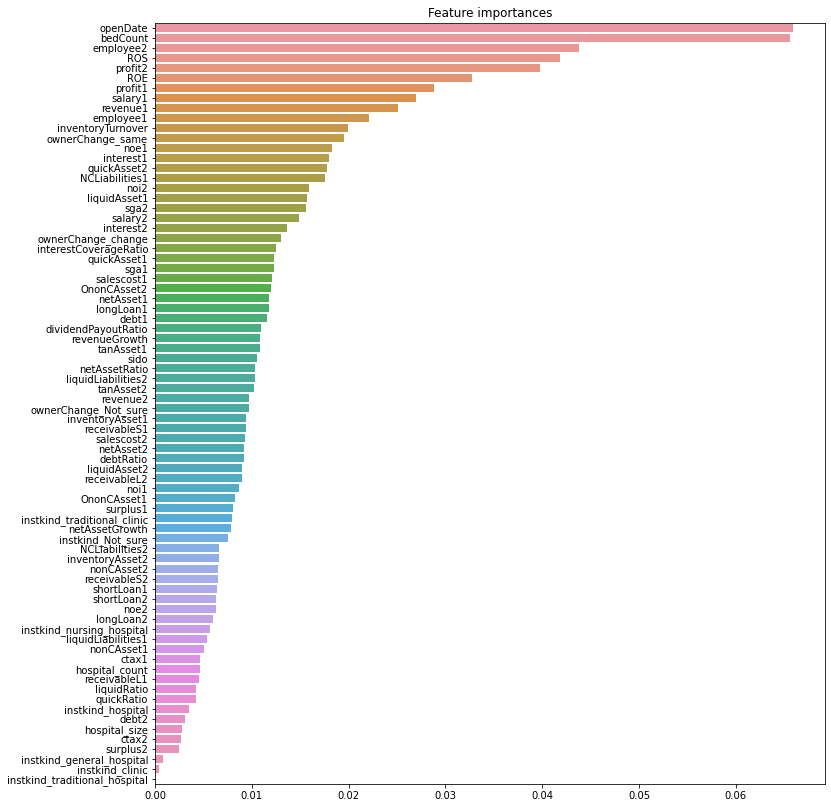

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values=rf_clf.feature_importances_ #피처 중요도
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top=ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(12,14))
plt.title('Feature importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators':[200],
    'max_depth':[4,6,8,10,12],
    'min_samples_leaf':[6,8,12,18],
    'min_samples_split':[4,8,16,20]
}
#RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf=RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 4, 'min_samples_leaf': 6, 'min_samples_split': 4, 'n_estimators': 200}
최고 예측 정확도:0.944444


## (2) XGBoost

In [60]:
import xgboost as xgb
from xgboost import XGBClassifier

In [61]:
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [62]:
X_features = train.drop(columns = 'OC',axis=1)
y_label = train['OC']

X_train,X_test,y_train,y_test = train_test_split(X_features,y_label, test_size = 0.2, random_state = 156, stratify = y_label)
print(X_train.shape,X_test.shape)

(234, 76) (59, 76)


In [63]:
print(y_train.value_counts()/y_train.shape[0]*100)
print(y_test.value_counts()/y_test.shape[0]*100)

1   94.87
0    5.13
Name: OC, dtype: float64
1   94.92
0    5.08
Name: OC, dtype: float64


In [64]:
dtrain = xgb.DMatrix(data=X_train,label = y_train)
dtest = xgb.DMatrix(data=X_test,label = y_test)

In [65]:
params = {
    'max_depth' :3,
    'eta' : 0.1,
    'objective' : 'binary:logistic',
    'eval_metric':'logloss',
    'early_stoppings':100
}
num_rounds = 400

In [ ]:
wlist=[(dtrain,'train'),(dtest,'eval')]
#하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model=xgb.train(params=params,dtrain=dtrain,num_boost_round=num_rounds, early_stopping_rounds=100,evals=wlist)

In [67]:
pred_probs=xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨')
print(np.round(pred_probs[:10],3))

#예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds=[1 if x>0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:',preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률값으로 표시됨
[0.978 0.976 0.924 0.978 0.978 0.978 0.945 0.974 0.978 0.978]
예측값 10개만 표시: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score
from sklearn.metrics import f1_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [69]:
def get_clf_eval(y_test, pred=None, pred_proba=None): #평가 한번에 호출하는 함수
  confusion = confusion_matrix(y_test, pred)
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)

  #ROC-AUC 추가
  roc_auc = roc_auc_score(y_test, pred_proba)

  print('오차행렬')
  print(confusion)
  print('정확도 : {0:.4f}, 정밀도 : {1:.4f}, 재현율:{2:.4f}, F1 : {3:.4f}, AUC : {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [70]:
get_clf_eval(y_test,preds,pred_probs)

오차행렬
[[ 0  3]
 [ 1 55]]
정확도 : 0.9322, 정밀도 : 0.9483, 재현율:0.9821, F1 : 0.9649, AUC : 0.8452


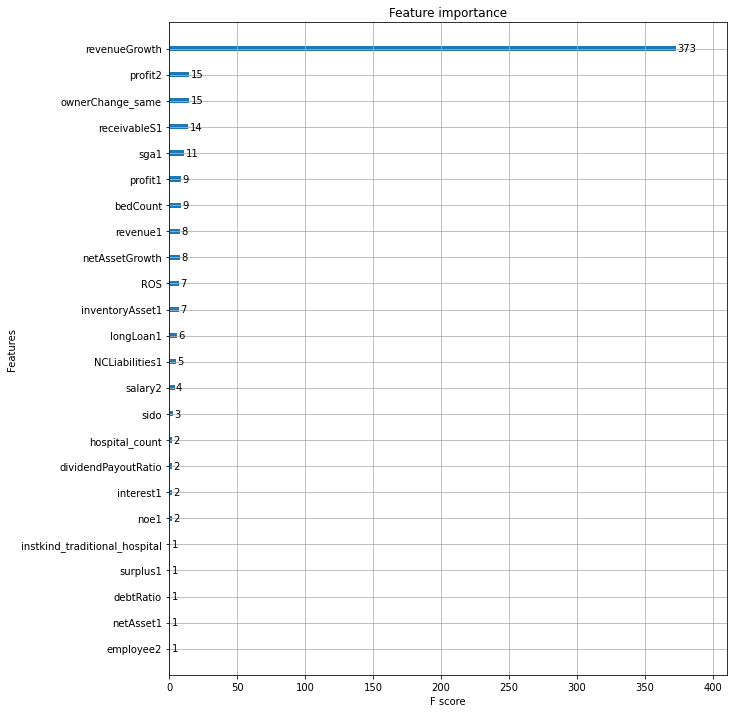

In [71]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax=plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax=ax)

In [ ]:
xgb.cv(params,dtrain,num_boost_round=10,nfold=3,stratified=False,metrics=(),obj=None,feval=None,maximize=False,early_stopping_rounds=None,fpreproc=None,as_pandas=True,verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)

In [77]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators' : [100,200,300,400],
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'max_depth' : [4,6,8,10,12],
    'min_child_weight' : [0.8,1,1.2],
    'gamma' : [0,1,2,3],
    'subsample':[0.8,1],
    'colsample_bytree' : [0.8,0.9],
}

xgb_clf = XGBClassifier(random_state=156, n_jobs=-1)
xgb_gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=2, n_jobs=-1, verbose = 2)
xgb_gridcv.fit(X_train, y_train, 
           early_stopping_rounds=40, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])
print('GridSearchCV 최적 파라미터:\n', xgb_gridcv.best_params_)
print('최고 예측 정확도:{0:4f}'.format(xgb_gridcv.best_score_))

Fitting 2 folds for each of 3840 candidates, totalling 7680 fits
[0]	validation_0-auc:0.63964	validation_1-auc:0.60119
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 40 rounds.
[1]	validation_0-auc:0.833709	validation_1-auc:0.779762
[2]	validation_0-auc:0.973724	validation_1-auc:0.964286
[3]	validation_0-auc:0.978228	validation_1-auc:0.964286
[4]	validation_0-auc:0.990616	validation_1-auc:0.934524
[5]	validation_0-auc:0.998123	validation_1-auc:0.928571
[6]	validation_0-auc:0.994369	validation_1-auc:0.910714
[7]	validation_0-auc:0.996622	validation_1-auc:0.946429
[8]	validation_0-auc:0.995495	validation_1-auc:0.934524
[9]	validation_0-auc:0.996997	validation_1-auc:0.964286
[10]	validation_0-auc:0.997372	validation_1-auc:0.958333
[11]	validation_0-auc:0.995495	validation_1-auc:0.958333
[12]	validation_0-auc:0.995495	validation_1-auc:0.97619
[13]	validation_0-auc:0.995871	validation_1-auc:0.

###**xgboost GridSearchCV 최적 파라미터**: {'eta(learning rate)': 0.01, 'num_round(n_estimators)': 100, 'max_depth': 4, 'min_child_weight': 0.8, 'gamma': 0, 'subsample': 0.8, 'colsample_bytree': 0.8}###

In [78]:
params={
    'n_estimators' : 100,
    'learning_rate' : 0.01,
    'max_depth' : 4,
    'min_child_weight' : 0.8,
    'subsample':0.8,
    'colsample_bytree' : 0.8,
    'objective' : 'binary:logistic',
    'eval_metric':'logloss',
    #'early_stoppings':100
}

In [ ]:
wlist=[(dtrain,'train'),(dtest,'eval')]
xgb_model=xgb.train(params=params,dtrain=dtrain,evals=wlist)

In [80]:
pred_probs=xgb_model.predict(dtest)
preds=[1 if x>0.5 else 0 for x in pred_probs]

In [81]:
get_clf_eval(y_test,preds,pred_probs)

오차행렬
[[ 0  3]
 [ 0 56]]
정확도 : 0.9492, 정밀도 : 0.9492, 재현율:1.0000, F1 : 0.9739, AUC : 0.9643


## (3) LightGBM

In [ ]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 앞서 XGBoost와 동일하게 n_estimators는 400설정
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기중단 수행가능
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train,
                 early_stopping_rounds=100, eval_metric="logloss",
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

In [ ]:
get_clf_eval(y_test,preds,pred_proba)

오차행렬
[[ 0  3]
 [ 0 56]]
정확도 : 0.9492, 정밀도 : 0.9492, 재현율:1.0000, F1 : 0.9739, AUC : 0.8333


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행속도를 향상시키기 위해 n_estimators를 200으로 감소
lgbm_wrapper = LGBMClassifier(n_estimators=400)

params = {
    'num_leaves':[32,64],
    'max_depth':[128, 160], 
    'min_child_samples':[60,100],
    'subsample':[0.8,1]
}

# cv는 3으로 지정
gridcv= GridSearchCV(lgbm_wrapper, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, 
           early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average="macro")
print("ROC AUC : {0:.4f}".format(lgbm_roc_score))

light gbm GridSearchCV 최적 파라미터: {'max_depth': 128, 'min_child_samples': 60, 'num_leaves': 32, 'subsample': 0.8}

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=400,max_depth= 128, min_child_samples=60, num_leaves= 32, subsample= 0.8)
evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train,
             early_stopping_rounds=100, eval_metric="auc", eval_set=evals, verbose=True)
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average="macro")
print("ROC AUC: {0:.4f}".format(lgbm_roc_score))

[1]	valid_0's auc: 0.469298	valid_0's binary_logloss: 0.153974
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.714912	valid_0's binary_logloss: 0.153577
[3]	valid_0's auc: 0.377193	valid_0's binary_logloss: 0.156645
[4]	valid_0's auc: 0.377193	valid_0's binary_logloss: 0.15749
[5]	valid_0's auc: 0.359649	valid_0's binary_logloss: 0.159161
[6]	valid_0's auc: 0.438596	valid_0's binary_logloss: 0.158552
[7]	valid_0's auc: 0.394737	valid_0's binary_logloss: 0.161554
[8]	valid_0's auc: 0.372807	valid_0's binary_logloss: 0.162307
[9]	valid_0's auc: 0.381579	valid_0's binary_logloss: 0.162015
[10]	valid_0's auc: 0.390351	valid_0's binary_logloss: 0.164492
[11]	valid_0's auc: 0.390351	valid_0's binary_logloss: 0.165517
[12]	valid_0's auc: 0.416667	valid_0's binary_logloss: 0.165942
[13]	valid_0's auc: 0.495614	valid_0's binary_logloss: 0.163751
[14]	valid_0's auc: 0.434211	valid_0's binary_logloss: 0.165714
[15]	valid_0's auc: 0.508772	valid_0's binary_loglo

In [ ]:
preds = lgbm_clf.predict(X_test)
pred_proba = lgbm_clf.predict_proba(X_test)[:, 1]

In [ ]:
get_clf_eval(y_test,preds,pred_proba)

오차행렬
[[ 0  2]
 [ 0 57]]
정확도 : 0.9661, 정밀도 : 0.9661, 재현율:1.0000, F1 : 0.9828, AUC : 0.7149


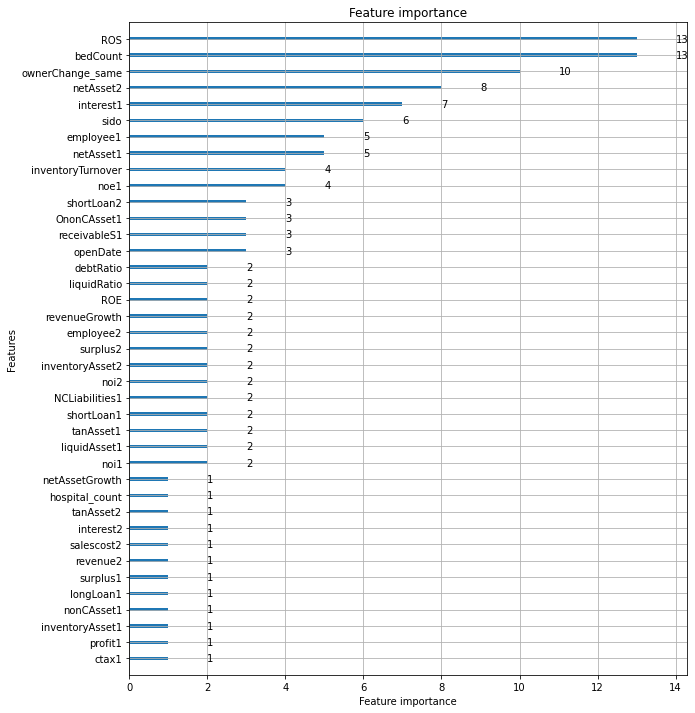

In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# cv는 3으로 지정
gridcv= GridSearchCV(lgbm_wrapper, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, 
           early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])
print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average="macro")
print("ROC AUC : {0:.4f}".format(lgbm_roc_score))

ValueError: ignored